<a href="https://colab.research.google.com/github/einsteinxx/COMSCI_168_SPRING_2019/blob/master/Filter_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving taj_grayscale.jpg to taj_grayscale (4).jpg


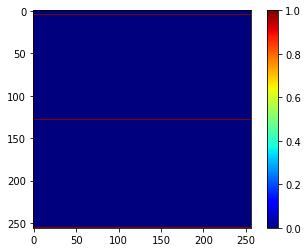

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import matplotlib.image as mpimg
from PIL import Image
from google.colab import files
from io import BytesIO


data = np.zeros((256,256))


data[128,:]= 1
data[5,:] = 1
data[data.shape[0]-1,:]=1
data[:,0]=1

f1 = plt.figure()
plt.imshow(data,cmap='jet')
plt.colorbar()







uploaded = files.upload()

img = Image.open(BytesIO(uploaded['taj_grayscale.jpg']))

img = np.array(img)
#img=np.array(img)[:,:,0]

#img=mpimg.imread('/home/kgonzalez/COMSCI_168_SPRING_2019/taj_grayscale.jpg')

inside avg
inside median
inside max


Text(0.5, 1.0, 'Max Image')

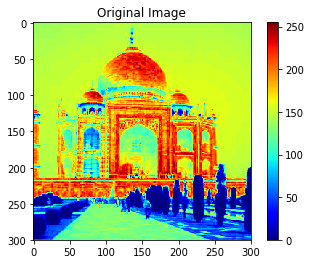

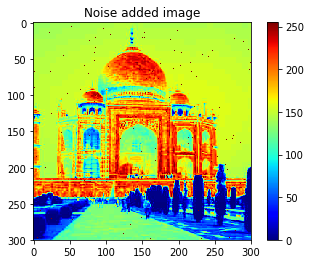

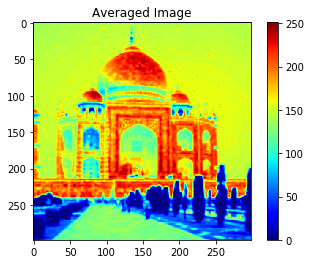

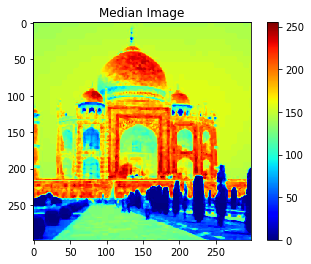

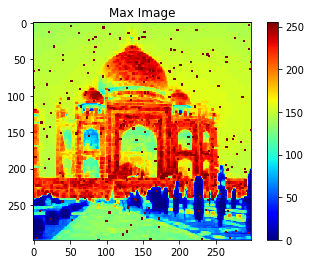

In [97]:
import random
from copy import copy, deepcopy


x,y =img.shape


#############################################
def avg(noisy_img,x,y):
  print('inside avg')
  
    ### Low Pass filter AVERAGE
  #new blank image
  new_img = np.zeros((x-2,y-2))

  for ii in range(2,x-1):
    for jj in range(2,y-1):
      #apply 3x3 filter, skipped first/last row/column for now
      r0 = noisy_img[ii-1:ii+2,jj-1]
      r1 = noisy_img[ii-1:ii+2,jj]
      r2 = noisy_img[ii-1:ii+2,jj+1]
      av = sum(r0) + sum(r1) + sum(r2)
      av = av/9
      new_img[ii-1,jj-1]=av
      
  return new_img
#################################################

def median(noisy_img,x,y):
  import statistics
  
  print('inside median')
  #MEDIAN FILTER
  new_img = np.zeros((x-2,y-2))
  for ii in range(2,x-1):
    for jj in range(2,y-1):
      #apply 3x3 filter, skipped first/last row/column for now
      r0=noisy_img[ii-1:ii+2,jj-1]
      r1=noisy_img[ii-1:ii+2,jj]
      r2=noisy_img[ii-1:ii+2,jj+1]
      
      #print(type(r0))
      val = np.concatenate([r0.flatten(),r1.flatten(),r2.flatten()])
      #print(val.shape)
      val = statistics.median(val)
      #print(val)
      new_img[ii-1,jj-1]=val

  return new_img
####################################################

#################################################

def max_filter(noisy_img,x,y):
  import statistics
  
  print('inside max')
  #MAX FILTER
  new_img = np.zeros((x-2,y-2))
  for ii in range(2,x-1):
    for jj in range(2,y-1):
      #apply 3x3 filter, skipped first/last row/column for now
      r0=noisy_img[ii-1:ii+2,jj-1]
      r1=noisy_img[ii-1:ii+2,jj]
      r2=noisy_img[ii-1:ii+2,jj+1]
      
      #print(type(r0))
      val = np.concatenate([r0.flatten(),r1.flatten(),r2.flatten()])
      #print(val.shape)
      val = np.amax(val)
      #print(val)
      new_img[ii-1,jj-1]=val

  return new_img
####################################################







#noisy image
#noisy_img = random.randint(1,5) * img


noisy_img = deepcopy(img)
#noisy_img = img ### doesn't work, can't copy like matlab
for xx in range(1,200):
  noisy_img[random.randint(1,x-1),random.randint(1,x-1)] = 255
  
  
av_img = avg(noisy_img,x,y)
med_img = median(noisy_img,x,y)
max_img = max_filter(noisy_img,x,y)



### SHOW INPUT/OUTPUT IMAGES

plt.close('all') #close everything


f1 = plt.figure()
plt.imshow(img,cmap='jet')
plt.colorbar()
plt.title('Original Image')

plt.figure()
plt.imshow(noisy_img,cmap= 'jet')
plt.colorbar()
plt.title('Noise added image')

f2 = plt.figure()
plt.imshow(av_img,cmap='jet')
plt.colorbar()
plt.title('Averaged Image')

f3 = plt.figure()
plt.imshow(med_img,cmap='jet')
plt.colorbar()
plt.title('Median Image')

f4 = plt.figure()
plt.imshow(max_img,cmap='jet')
plt.colorbar()
plt.title('Max Image')

In [87]:
a = np.zeros((3,1))
b = np.zeros((3,1))
a[0]=1
a=a.ravel()
b=b.ravel()
print(type(a))
a.shape

c=np.concatenate([a,b])


<class 'numpy.ndarray'>
